<a href="https://colab.research.google.com/github/Hero0963/kaggle/blob/main/kaggle_binary_classification_of_machine_failures/machine_failures_baseline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
files.upload()

In [ ]:
!rm -r ~/.kaggle
!mkdir ~/.kaggle
!mv ./kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

rm: cannot remove '/root/.kaggle': No such file or directory


In [ ]:
!kaggle competitions download -c playground-series-s3e17

100% 3.49M/3.49M [00:01<00:00, 4.03MB/s]
100% 3.49M/3.49M [00:01<00:00, 3.02MB/s]


In [ ]:
import zipfile
import pandas as pd

# 解壓縮zip檔案
with zipfile.ZipFile('/content/playground-series-s3e17.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/extracted_folder')


In [ ]:
df = pd.read_csv('/content/extracted_folder/train.csv')

In [ ]:
display(df.head(10))

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0
5,5,M24300,M,298.4,308.9,1429,42.1,65,0,0,0,0,0,0
6,6,L56736,L,299.6,311.0,1413,42.9,156,0,0,0,0,0,0
7,7,L55488,L,298.7,310.1,1609,38.1,67,0,0,0,0,0,0
8,8,L56397,L,297.7,308.8,1578,35.2,13,0,0,0,0,0,0
9,9,L55067,L,300.5,312.3,1447,53.3,98,0,0,0,0,0,0


In [ ]:
missing_values = df.isnull().sum()
display(missing_values)

id                         0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

In [ ]:
features = df.drop('Machine failure', axis=1)
label = df['Machine failure']

In [ ]:
df.describe()

,id,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000
mean,68214.000000,299.862776,309.941070,1520.331110,40.348643,104.408901,0.015744,0.001554,0.005160,0.002397,0.003958,0.002258
std,39383.804275,1.862247,1.385173,138.736632,8.502229,63.965040,0.124486,0.039389,0.071649,0.048899,0.062789,0.047461
min,0.000000,295.300000,305.800000,1181.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,34107.000000,298.300000,308.700000,1432.000000,34.600000,48.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,68214.000000,300.000000,310.000000,1493.000000,40.400000,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,102321.000000,301.200000,310.900000,1580.000000,46.100000,159.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,136428.000000,304.400000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136429 entries, 0 to 136428
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       136429 non-null  int64  
 1   Product ID               136429 non-null  object 
 2   Type                     136429 non-null  object 
 3   Air temperature [K]      136429 non-null  float64
 4   Process temperature [K]  136429 non-null  float64
 5   Rotational speed [rpm]   136429 non-null  int64  
 6   Torque [Nm]              136429 non-null  float64
 7   Tool wear [min]          136429 non-null  int64  
 8   Machine failure          136429 non-null  int64  
 9   TWF                      136429 non-null  int64  
 10  HDF                      136429 non-null  int64  
 11  PWF                      136429 non-null  int64  
 12  OSF                      136429 non-null  int64  
 13  RNF                      136429 non-null  int64  
dtypes: f

None

In [ ]:
unique_counts = df.nunique()
display(unique_counts)

id                         136429
Product ID                   9976
Type                            3
Air temperature [K]            95
Process temperature [K]        81
Rotational speed [rpm]        952
Torque [Nm]                   611
Tool wear [min]               246
Machine failure                 2
TWF                             2
HDF                             2
PWF                             2
OSF                             2
RNF                             2
dtype: int64

Temperature conversion:
- 300 K is equivalent to 26.85 °C.

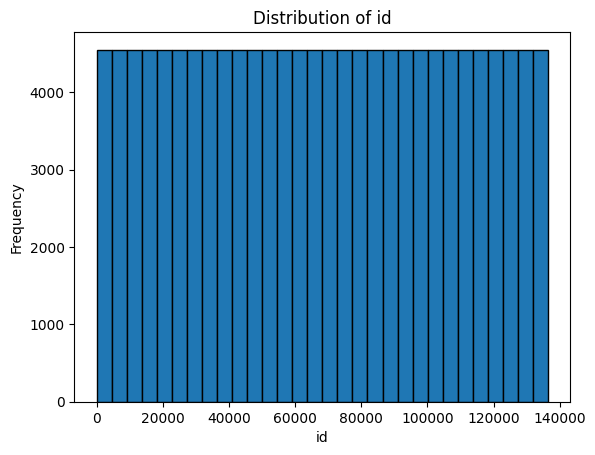

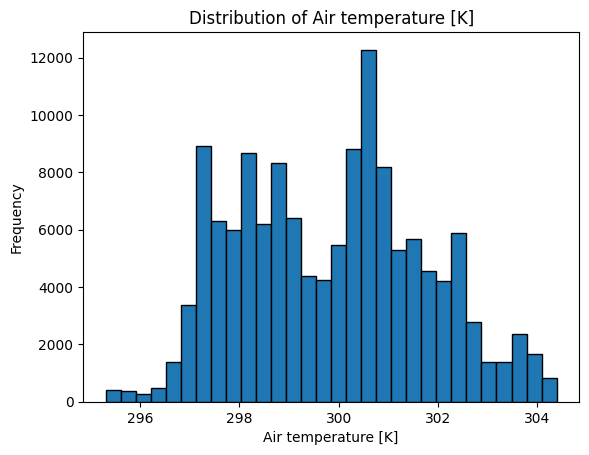

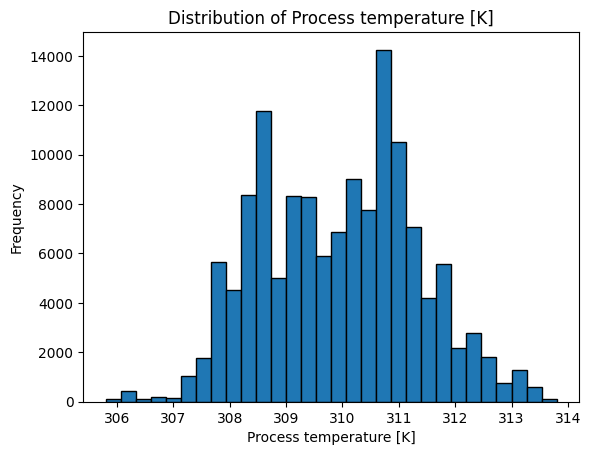

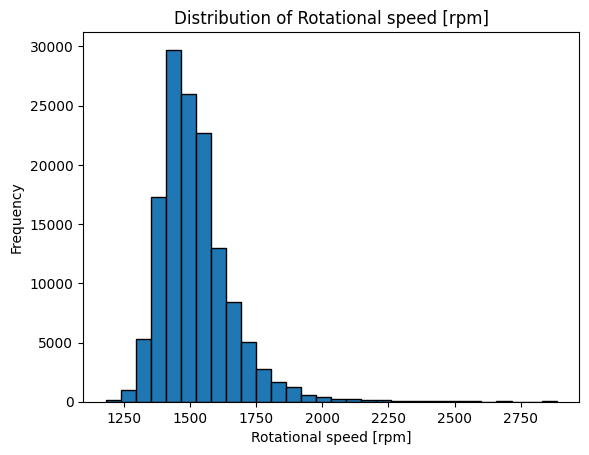

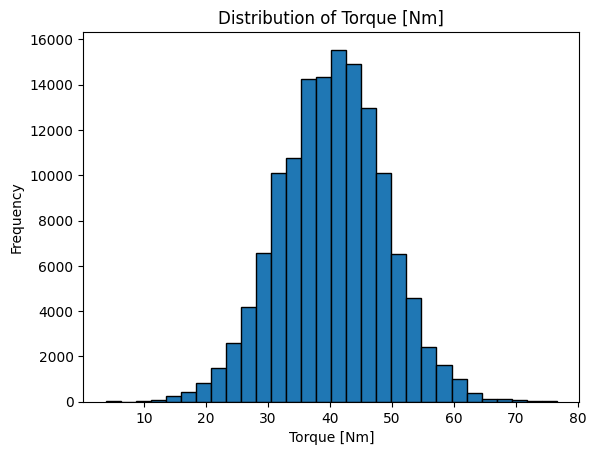

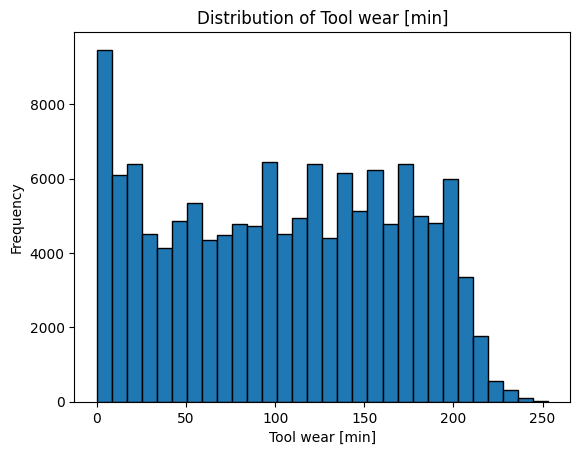

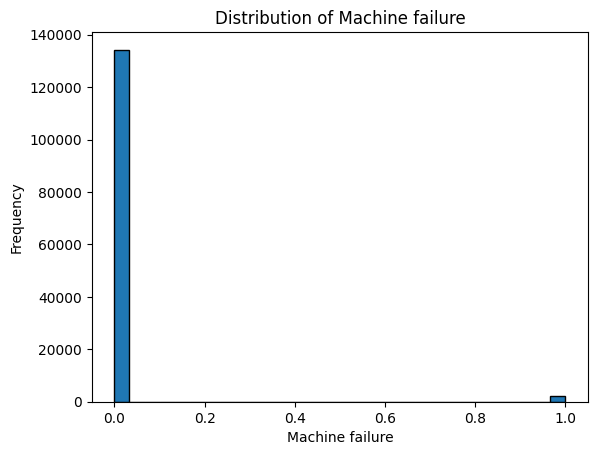

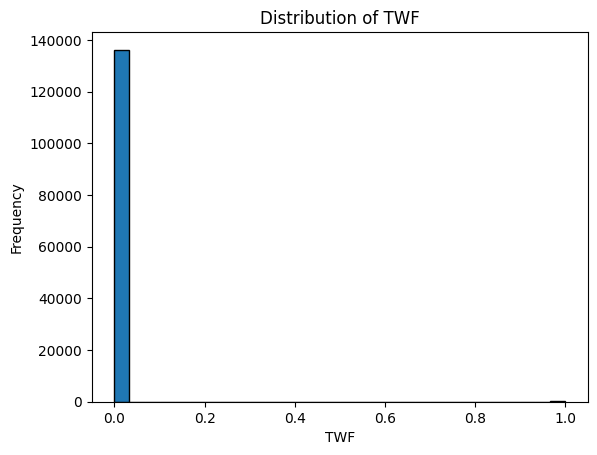

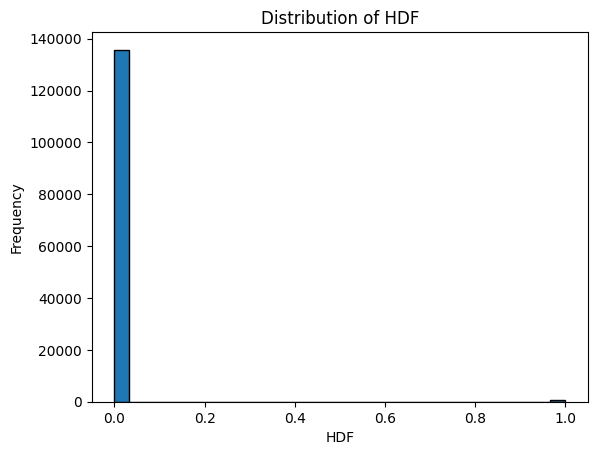

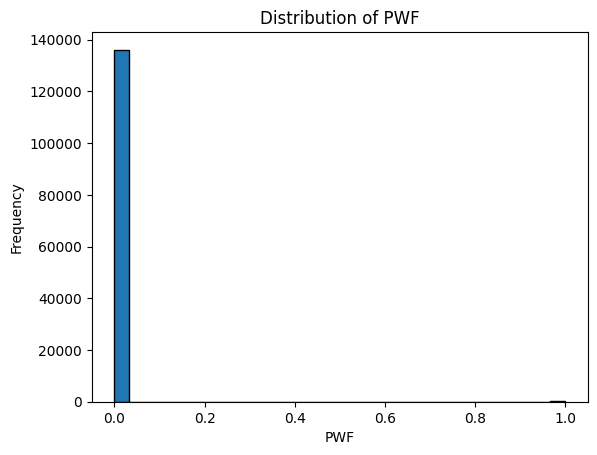

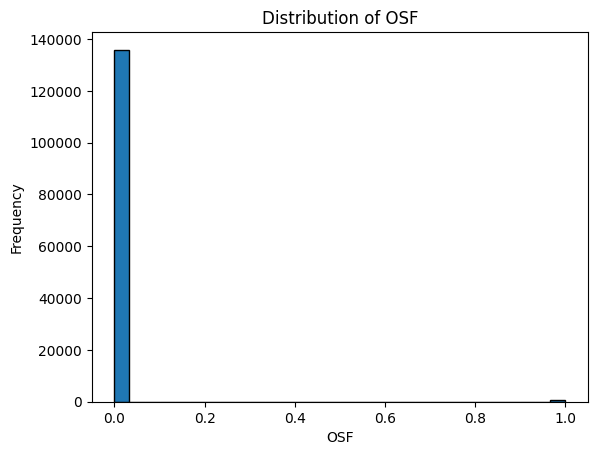

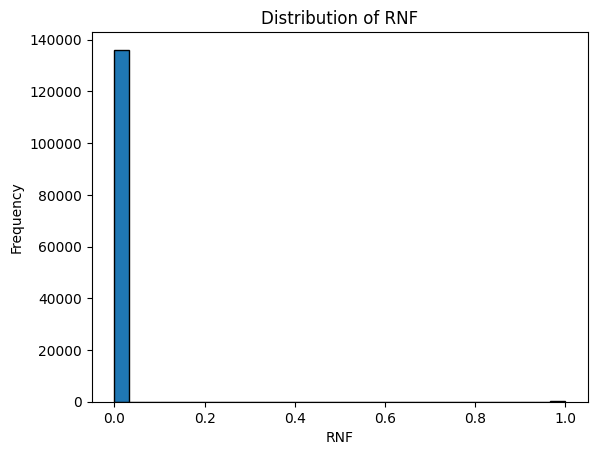

In [ ]:
import matplotlib.pyplot as plt

for column in df.columns:
    if df[column].dtype == 'object':
        pass

    else:
        plt.figure()
        df[column].plot(kind='hist', bins=30, edgecolor='black')
        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.show()

<ipython-input-18-ec68da00f916>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True, linewidth = 1)


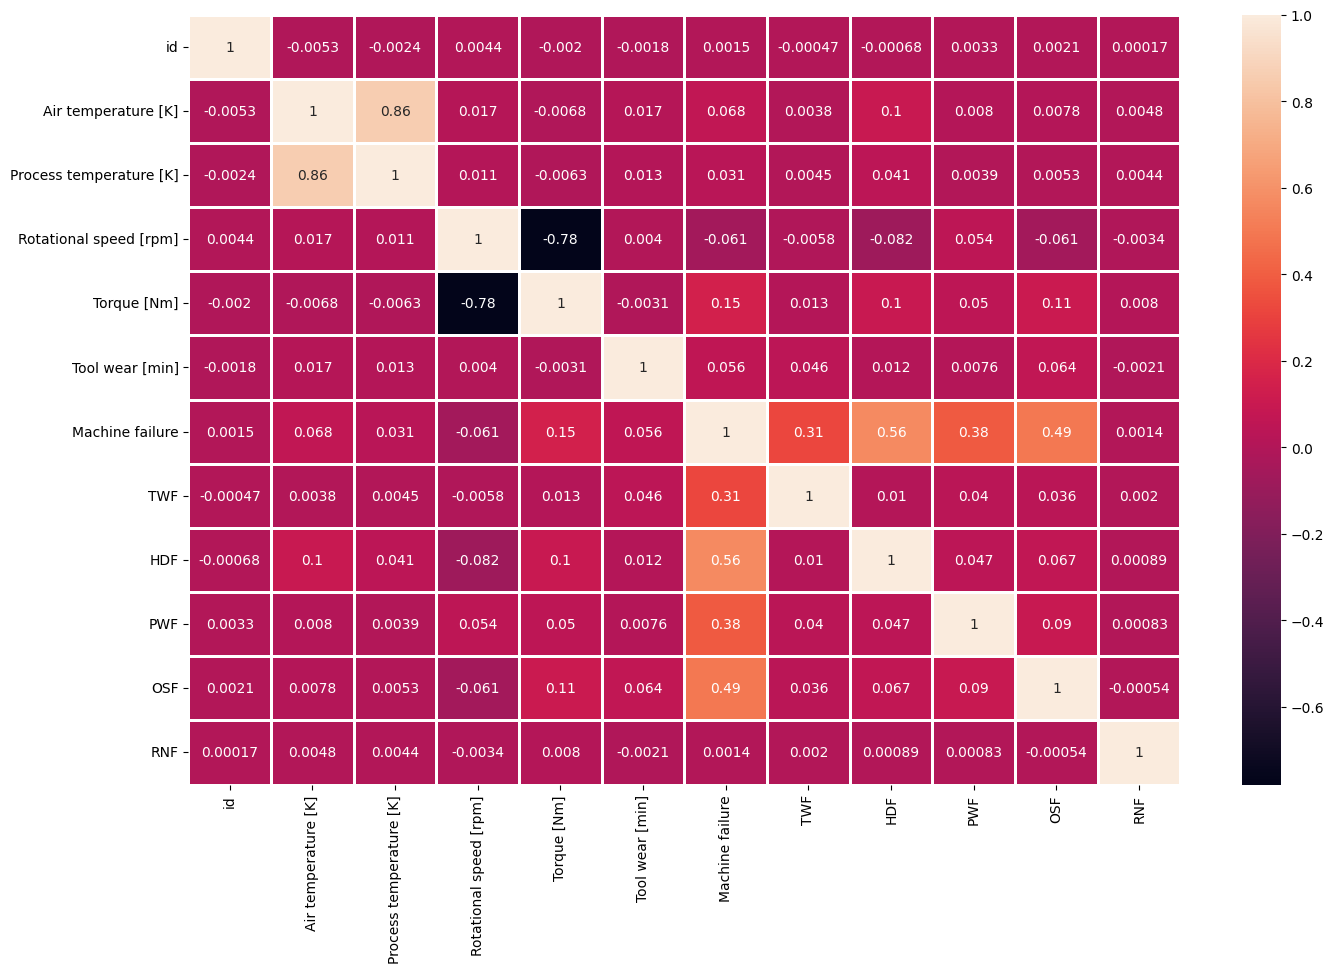

In [ ]:
import seaborn as sns

# 比較每個特徵間的關聯程度
fig, ax = plt.subplots(figsize = (16, 10))
sns.heatmap(df.corr(), annot = True, linewidth = 1)
plt.show()

# 找出高度正相關的特徵們

In [ ]:
correlations = df.corr()['Machine failure'].abs().sort_values(ascending=False)
display(correlations)

<ipython-input-25-2714bad94f21>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = df.corr()['Machine failure'].abs().sort_values(ascending=False)


Machine failure            1.000000
HDF                        0.564507
OSF                        0.494668
PWF                        0.383941
TWF                        0.311919
Torque [Nm]                0.145793
Air temperature [K]        0.067744
Rotational speed [rpm]     0.060868
Tool wear [min]            0.056448
Process temperature [K]    0.030966
id                         0.001500
RNF                        0.001428
Name: Machine failure, dtype: float64

In [ ]:
X = features
y = label

In [ ]:
selected_features = ['HDF', 'OSF', 'PWF', 'TWF', 'Torque [Nm]']

In [ ]:
X_s = X[selected_features]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_s, y, test_size = 0.2, random_state = 42)
rfc = RandomForestClassifier(n_estimators=200)
rfc_eval = cross_val_score(estimator = rfc, X = X_train, y = y_train, cv = 5)
display(rfc_eval)

array([0.99587704, 0.99578542, 0.99693069, 0.99624336, 0.99601429])

In [ ]:
df_test = pd.read_csv('/content/extracted_folder/test.csv')

In [ ]:
test_X = df_test[selected_features]

In [ ]:
rf = RandomForestClassifier(n_estimators=200)
rf.fit(X_train, y_train.values.ravel())

RandomForestClassifier(n_estimators=200)

In [ ]:
predicted_labels = rf.predict(test_X)

In [ ]:
submission = pd.DataFrame({'id': df_test['id'], 'Machine failure': predicted_labels})
submission['Machine failure'] = submission['Machine failure'].astype(float) # convert_data_type_important
submission.to_csv('kaggle_bi_classification.csv', index=False)